# Practice 2: Modeling the growth of pulmonary nodules

Performing image follow-up (CT) in a patient with a lung injury, the situation described in the image (taken from Cornelis et al Diagnostic and Interventional Imaging (2013) 94, 593-600) is observed. In view of the benign appearance of the lesion, it was decided to observe it during a
time without treating it.

<img src="img/im.png">

The volumes measured from the images are (a) 2.3 $cm^3$ (diagnostic CT), (b) 3.3 $cm^3$ (18 months later), (c) 4.8 $cm^3$ (17 months after b). A subsequent image test provides a value of 6.1 $cm^3$ six months later. <br><br>
**Groups of students must be formed to develop the following activities:**
* It provides a forecast of volume growth for the next revision, another six months later.
* How does the diameter of the lesion grow assuming it is approximately spherical? Is it compatible with a linear growth model?

## Tumor volume forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
d_time = np.array([0, 18, 35, 41]) # time from initial measurement, months
d_volume = np.array([2.3, 3.3, 4.8, 6.1]) # tumor's volume, cm^3

Let's plot our data!

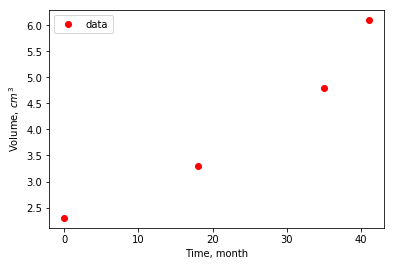

In [3]:
plt.plot(d_time, d_volume, 'ro', label='data');
plt.xlabel('Time, month')
plt.ylabel('Volume, $cm^3$')
plt.legend();

Assuming that tumor has spherical form we have computed 'radius'. According to measurements maximum radius is $1.15 cm$, it is less that $3 cm$ - value of radis in brain tumors when we have no survivors. And this is a nodule in the lung - organ, which is bigger than brain. That's mean that we are probably far from saturation and can use model from previous submission(logistic equation with saturation) that showed best results: <br>
$$\frac{dN}{dt} = \frac{1}{\tau}N\Big(1 - \frac{N}{K}\Big)$$
where $\tau$ ~ Population doubling time, $K = $ Max. cell number
Solution of above equation is:
$$N(t) = \frac{K}{1 + (\frac{K}{N(0)} - 1)exp(-\frac{t}{\tau})}$$

In [4]:
K_MAX = np.max(d_volume)
N_0 = d_volume[0]
def model_3(t, tau):
    """Model 3 formula"""
    K = K_MAX
    n0 = N_0
    return K / (1 + (K / n0 - 1) * np.exp(-t/tau))

In [5]:
p_opt, p_cov = curve_fit(model_3, d_time, d_volume)

Let's look at our approximation:

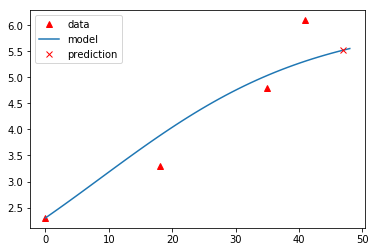

In [6]:
plt.plot(d_time, d_volume, 'r^', label='data');
x_to_plot = np.linspace(0, d_time[-1] + 6 + 1)
plt.plot(x_to_plot, model_3(x_to_plot, *p_opt), label='model');
plt.plot(d_time[-1] + 6, model_3(d_time[-1] + 6, *p_opt), 'xr', label='prediction');
plt.legend();

In [7]:
print('Prediction by model with saturation:', model_3(d_time[-1] + 6, *p_opt), 'cm^3')

Prediction by model with saturation: 5.526053797847361 cm^3


Previous result is not promising. As we mentioned before we can neglect saturation effect, so let's try model without saturation. Also, we see that something like $exp(t)$ would decribe this data:

$$N(t) = {N(t_0)}exp\Big(\frac{t - t_0}{\tau}\Big)$$

In [8]:
N_0 = d_volume[0]
def model_2(t, tau):
    """Model #2 formula"""
    t0 = 0
    n0 = N_0
    return n0 * np.exp((t - t0) / tau)

In [9]:
p_opt_1, p_cov_1 = curve_fit(model_2, d_time, d_volume)

Let's plot our fitting:

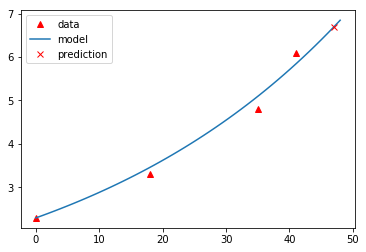

In [10]:
plt.plot(d_time, d_volume, 'r^', label='data');
x_to_plot = np.linspace(0, d_time[-1] + 6 + 1)
plt.plot(x_to_plot, model_2(x_to_plot, *p_opt_1), label='model');
plt.plot(d_time[-1] + 6, model_2(d_time[-1] + 6, *p_opt_1), 'xr', label='prediction');
plt.legend();

In [11]:
print('Prediction by model without saturation:', model_2(d_time[-1] + 6, *p_opt_1), 'cm^3')

Prediction by model without saturation: 6.691230685837073 cm^3


## Tumor diameter grow

In [12]:
def get_diam_by_volume(volume):
    return np.power(6 * volume / np.pi, 1 / 3)

In [13]:
d_diam = get_diam_by_volume(d_volume)
print(d_diam)

[1.63773289 1.84716251 2.09289547 2.26695938]


To answer the question, is it possible to describe tumor diameter growth by linear growth we will fit linear model to 'd_radius' data:

In [14]:
def linear_model(t, k, b):
    return k * t + b

In [15]:
p_opt_linear, c_opt_linear = curve_fit(linear_model, d_time, d_diam)

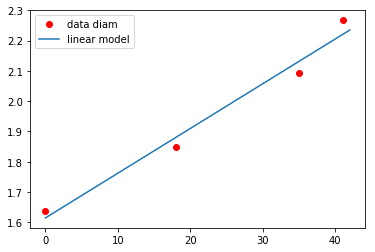

In [16]:
plt.plot(d_time, d_diam, 'ro', label='data diam');
x_tmp = np.linspace(d_time[0], d_time[-1] + 1, 50);
plt.plot(x_tmp, linear_model(x_tmp, *p_opt_linear), label='linear model');
plt.legend();

# Conclusion
* Prediction of tumor size in 6 months - 6.69 $cm^3$
* Visually it seems possibly that tumor's diameter growth low is linear, however statistical test should be done